In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("vehicledata.csv")
df.head()

,Manufacturer,Model,Description,Transmission,Vehicle_Type,Engine_Capacity,Fuel_Type,Powertrain,Engine_PowerPS,Engine_Power,Emissions_CO2,THC0Emissions0[mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined
0,ABARTH,595 MY22,1.4 Tjet 165 hp Manual (VL),M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,121,688,66.0,28,NaN,NaN,60.0,60.0
1,ABARTH,595 MY22,1.4 Tjet 165 hp Manual (VH),M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,121,688,66.0,28,NaN,NaN,60.0,60.0
2,ABARTH,595 MY22,1.4 Tjet 165 hp Manual Convertible (VL),M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,121,688,66.0,28,NaN,NaN,60.0,60.0
3,ABARTH,595 MY22,1.4 Tjet 165 hp Manual Convertible (VH),M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,121,688,66.0,28,NaN,NaN,60.0,60.0
4,ABARTH,595 MY22,Turismo 1.4 Tjet 165 hp Manual (VL),M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,121,688,66.0,28,NaN,NaN,60.0,60.0


In [5]:
pd.options.display.max_rows = 1000
cdf=df[['Manufacturer','Transmission','Vehicle_Type','Engine_Capacity','Fuel_Type','Powertrain','Engine_PowerPS','Emissions_CO2']]
cdf.head()

,Manufacturer,Transmission,Vehicle_Type,Engine_Capacity,Fuel_Type,Powertrain,Engine_PowerPS,Emissions_CO2
0,ABARTH,M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,688
1,ABARTH,M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,688
2,ABARTH,M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,688
3,ABARTH,M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,688
4,ABARTH,M5,Manual,1368,Petrol,Internal Combustion Engine (ICE),165,688


In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Manufacturer     4916 non-null   object
 1   Transmission     4907 non-null   object
 2   Vehicle_Type     4916 non-null   object
 3   Engine_Capacity  4916 non-null   int64 
 4   Fuel_Type        4916 non-null   object
 5   Powertrain       4916 non-null   object
 6   Engine_PowerPS   4916 non-null   int64 
 7   Emissions_CO2    4916 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 307.4+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cdf['Manufacturerle']=np.int64(le.fit_transform(cdf.Manufacturer))
# cdf['Modelle']=le.fit_transform(cdf.Model)
cdf['Transmissionle']=np.int64(le.fit_transform(cdf.Transmission))
cdf['Vehicle_Typele']=np.int64(le.fit_transform(cdf.Vehicle_Type))
cdf['Fuel_Typele']=np.int64(le.fit_transform(cdf.Fuel_Type))
cdf['Powertrainle']=np.int64(le.fit_transform(cdf.Powertrain))


C:\Users\asus\AppData\Local\Temp\ipykernel_22020\3569896875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Manufacturerle']=np.int64(le.fit_transform(cdf.Manufacturer))
C:\Users\asus\AppData\Local\Temp\ipykernel_22020\3569896875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Transmissionle']=np.int64(le.fit_transform(cdf.Transmission))
C:\Users\asus\AppData\Local\Temp\ipykernel_22020\3569896875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [8]:
scdf=cdf[['Manufacturerle','Transmissionle','Vehicle_Typele','Fuel_Typele','Powertrainle','Engine_PowerPS','Emissions_CO2']]

In [9]:

scdf.head()

,Manufacturerle,Transmissionle,Vehicle_Typele,Fuel_Typele,Powertrainle,Engine_PowerPS,Emissions_CO2
0,0,33,1,3,1,165,688
1,0,33,1,3,1,165,688
2,0,33,1,3,1,165,688
3,0,33,1,3,1,165,688
4,0,33,1,3,1,165,688


In [10]:
scdf.describe()

,Manufacturerle,Transmissionle,Vehicle_Typele,Fuel_Typele,Powertrainle,Engine_PowerPS,Emissions_CO2
count,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000
mean,22.138324,26.559805,0.367982,2.057974,1.276444,180.885476,243.205858
std,9.817272,7.439186,0.482305,1.162178,1.063528,112.477963,191.636980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,21.000000,0.000000,2.000000,1.000000,110.000000,88.000000
50%,24.000000,28.000000,0.000000,2.000000,1.000000,145.000000,195.000000
75%,31.000000,34.000000,1.000000,3.000000,1.000000,200.000000,351.000000
max,38.000000,44.000000,1.000000,4.000000,4.000000,802.000000,927.000000


In [11]:
scdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Manufacturerle  4916 non-null   int64
 1   Transmissionle  4916 non-null   int64
 2   Vehicle_Typele  4916 non-null   int64
 3   Fuel_Typele     4916 non-null   int64
 4   Powertrainle    4916 non-null   int64
 5   Engine_PowerPS  4916 non-null   int64
 6   Emissions_CO2   4916 non-null   int64
dtypes: int64(7)
memory usage: 269.0 KB


In [12]:

cdf.Transmission.value_counts()

Transmission
M6                    1142
A8                     557
M5                     492
CVT                    451
A7                     437
A6                     370
A9                     335
A8-AWD                 241
E-CVT                  138
DCT7                   102
A9-AWD                  94
MT6                     87
8AT                     48
AT6                     35
6MT                     30
SA7                     30
DCT6                    27
8A-AWD                  26
AC                      22
6AT                     20
A4                      18
SA5                     18
8AT-FWD                 17
A5                      17
8AT-AWD                 15
10 Speed Automatic      14
MT5                     13
7SP. SSG                13
7DCT                    13
eCVT                    13
AMT5                    12
A10                     11
7AT-FWD                 11
M6-AWD                   8
DCT8                     7
SA8                      5
6-speed auto DC

In [13]:
cdf.Manufacturer.value_counts()

Manufacturer
RENAULT                 874
DACIA                   607
MERCEDES-BENZ           484
TOYOTA                  377
LAND ROVER              289
KIA                     246
MAZDA                   241
FORD                    218
HONDA                   201
PEUGEOT                 186
SEAT                    136
CITROEN                 110
LEXUS                   104
JAGUAR                  104
HYUNDAI                  93
VOLVO                    86
FIAT                     64
ABARTH                   47
NISSAN                   45
ALPINE                   44
GENESIS                  42
DS                       40
CHRYSLER JEEP            36
ALFA ROMEO               33
MASERATI                 31
SUZUKI                   23
Rolls Royce              21
MG MOTORS UK             20
INEOS Automotive Ltd     20
SSANGYONG                18
FERRARI                  16
McLaren                  14
ASTON MARTIN LAGONDA     13
LOTUS                     9
SUBARU                    9
BENTLEY

In [14]:
# cdf.Model.value_counts()

In [15]:
# cdf.Engine_PowerPS.value_counts()


In [16]:
cdf.Vehicle_Type.value_counts()

Vehicle_Type
Automatic    3107
Manual       1809
Name: count, dtype: int64

In [17]:
cdf.Fuel_Type.value_counts()

Fuel_Type
Petrol               2247
Electric / Petrol    1474
Diesel                995
Electric / Diesel     124
Petrol / LPG           76
Name: count, dtype: int64

In [18]:
cdf.Powertrain.value_counts()

Powertrain
Internal Combustion Engine (ICE)          3139
Hybrid Electric Vehicle (HEV)              787
Mild Hybrid Electric Vehicle (MHEV)        466
Plug-in Hybrid Electric Vehicle (PHEV)     345
Micro Hybrid                               179
Name: count, dtype: int64

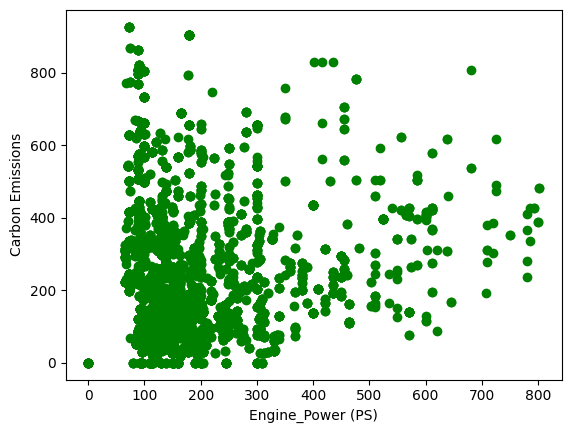

In [19]:
plt.scatter(cdf.Engine_PowerPS,cdf.Emissions_CO2,color='green')
plt.xlabel("Engine_Power (PS)")
plt.ylabel("Carbon Emissions")
plt.show()


In [20]:
msk=np.random.rand(len(df))<0.8
train=scdf[msk]
test=scdf[~msk]

In [21]:
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score
# x=np.asanyarray(train[['Manufacturerle','Transmissionle','Vehicle_Typele','Fuel_Typele','Powertrainle','Engine_PowerPS']])
# y=np.asanyarray(train[['Emissions_CO2']])
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.8,random_state=42)
# regr=linear_model.LinearRegression()
# regr.fit(X_train,y_train)

# y_pred=regr.predict(X_test)
# score=r2_score(y_test,y_pred)
# print('Coefficients',regr.coef_)
# regr.score(X_train,y_train)


In [22]:
# prediction_test=regr.predict(X_test)
# print(y_test,prediction_test)

In [23]:
# np.mean(prediction_test-y_test)**2

In [24]:
# from sklearn.calibration import cross_val_predict


# y_pred_lin = cross_val_predict(regr,X_train,y_train,cv=10)
# plt.scatter(y_train, y_pred_lin)
# plt.show()

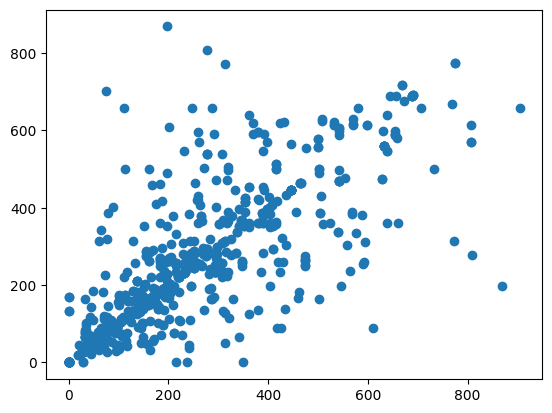

0.9319468581425028


In [25]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x=np.asanyarray(train[['Manufacturerle','Transmissionle','Vehicle_Typele','Fuel_Typele','Powertrainle','Engine_PowerPS']])
y=np.asanyarray(train[['Emissions_CO2']])
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.8,random_state=42)
regr=tree.DecisionTreeRegressor()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
score=r2_score(y_test,y_pred)
from sklearn.calibration import cross_val_predict
y_pred_lin = cross_val_predict(regr,X_train,y_train,cv=10)
plt.scatter(y_train, y_pred_lin)
plt.show()
print(regr.score(X_train,y_train))

In [26]:

import pickle


In [27]:
pickle.dump(regr,open("model.pkl","wb"))

In [28]:
regr=pickle.load(open("model.pkl","rb"))
# result=loaded_model.predict(X_test)
# result=loaded_model.predict([[0,40,1,3,1,179]])
print(regr.predict([[0,40,1,3,1,179]]))



[904.]


In [29]:
# from sklearn import ensemble
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score
# x=np.asanyarray(train[['Manufacturerle','Transmissionle','Vehicle_Typele','Fuel_Typele','Powertrainle','Engine_PowerPS']])
# y=np.asanyarray(train[['Emissions_CO2']])
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.8,random_state=0)
# regr=ensemble.RandomForestRegressor()
# regr.fit(X_train,y_train)
# y_pred=regr.predict(X_test)
# score=r2_score(y_test,y_pred)
# from sklearn.calibration import cross_val_predict
# y_pred_lin = cross_val_predict(regr,X_train,y_train,cv=10)
# plt.scatter(y_train, y_pred_lin)
# plt.show()
# print(regr.score(X_train,y_train))